Импортируем библиотеки.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!python --version

Python 3.8.16


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Рабочая директория в колабе.

In [ ]:
data_dir = '/content/drive/My Drive/Colab Notebooks/tenderhack/'

Тренировочный файл со всеми колонками.

In [ ]:
file = 'TenderHack_Moscow_train_data.xlsx'

Тестовый файл со всеми колонками.

In [ ]:
#test_file = 'Chekpoint_test_data.xlsx'
test_file = 'TenderHack_Moscow_test_data.xlsx'

# Чтение данных в датафрейм

Загрузим все данные в original_train_df, чтобы всегда был оригинал.

In [ ]:
original_train_df = pd.read_excel(data_dir + file)

Колонки оригинального тренировочного датафрейма.

In [ ]:
original_train_df.columns

Index(['id', 'Статус', 'Наименование КС', 'ОКПД 2', 'КПГЗ', 'Регион', 'НМЦК',
       'Итоговая цена', 'Дата', 'Участники', 'Ставки', 'ИНН'],
      dtype='object')

In [ ]:
original_train_df

,id,Статус,Наименование КС,ОКПД 2,КПГЗ,Регион,НМЦК,Итоговая цена,Дата,Участники,Ставки,ИНН
0,0,Завершена,СТУЛЬЯ УЧЕНИЧЕСКИЕ,NaN,01.06.01.03.01;01.06.01.03.01,Москва,596790.0,593806.05,2021-06-30 11:20:05.720,1,1,d8912494ba2edd3bfeba55206a78a0f5
1,1,Не состоялась,МЕДИЦИНСКИЕ РАСХОДНЫЕ МАТЕРИАЛЫ,NaN,01.02.10.50.33;01.02.10.43.05.01,Москва,4964.9,0.00,2022-10-04 09:16:04.770,0,0,237a5c57a66f02f8deb152e21f33863a
2,3,Завершена,Видеокарта Palit PCI-E,NaN,01.13.17.08,Москва,462000.0,311850.00,2021-07-01 13:23:09.177,6,65,040f1570117a744d529f4675f827a50f
3,4,Завершена,"ТОВАРЫ ИНФОРМАЦИОННО-ТЕХНОЛОГИЧЕСКИЕ, СРЕДСТВА...",NaN,01.13.11.03.02;01.13.04.04.06.05;01.10.04.04.0...,Москва,505555.0,460042.90,2021-03-16 10:42:20.810,6,18,c00c03dca0274fe43fc34e974434a927
4,5,Завершена,Пинцет острый,NaN,01.02.10.06.48.04,Москва,2000.0,1980.00,2022-05-26 11:04:42.597,2,2,cc997efa7a6742b6119a3c253a084e80
...,...,...,...,...,...,...,...,...,...,...,...,...
246757,288445,Не состоялась,Червячный хомут FORTISFLEX 110-130,NaN,01.09.08.01.05,Москва,1000.0,0.00,2022-03-30 12:23:15.930,0,0,c0e78808737d3ca61e2fea6ffeee09a2
246758,288446,Не состоялась,"Маскировочная сеть, ""Стандарт"", МС1-6, 3х6 м",NaN,01.24.01.99,Москва,60000.0,0.00,2022-10-03 09:42:05.507,0,0,d288dc670f1f23134c05badedd384899
246759,288447,Не состоялась,"ТРАНСПОРТНЫЕ СРЕДСТВА, РАСХОДНЫЕ МАТЕРИАЛЫ И З...",NaN,01.09.09.01.99;01.09.09.01.99;01.09.09.01.99;0...,Москва,402582.6,0.00,2021-04-20 09:13:12.317,0,0,5ea618d27797e380dd6e733a2ce83d49
246760,288449,Завершена,БЛАНКИ,NaN,01.15.02.07;01.15.02.07;01.15.02.07,Москва,18600.0,10500.00,2022-10-28 11:47:01.503,5,9,db7506287639f6c75770c9daace5856c


In [ ]:
original_train_df['ОКПД 2'].sort_values()

87179     01.11.71.110;10.83.13.120;10.83.13.120;10.83.1...
207177    01.11.71.110;10.83.13.120;10.83.13.120;10.83.1...
49049                                          01.11.75.110
551                                            01.11.75.110
86137     01.11.75.110;10.61.31.111;10.61.32.114;10.39.1...
                                ...                        
246756                                                  NaN
246757                                                  NaN
246758                                                  NaN
246759                                                  NaN
246760                                                  NaN
Name: ОКПД 2, Length: 246762, dtype: object

Загрузим оригинальный тестовый датафрейм.

In [ ]:
original_test_df = pd.read_excel(data_dir + test_file)

In [ ]:
original_test_df.columns

Index(['id', 'Наименование КС', 'ОКПД 2', 'КПГЗ', 'Регион', 'НМЦК', 'Дата',
       'ИНН'],
      dtype='object')

In [ ]:
original_test_df

,id,Наименование КС,ОКПД 2,КПГЗ,Регион,НМЦК,Дата,ИНН
0,2,Баллон со сжатым воздухом OfficeClean 400мл,NaN,01.15.05.19,Москва,17500.00,2022-10-20 14:26:03.187,364ca6d24ba0fc3806aa71e61c345b26
1,10,Зеркало KD_ настенное Attache 1801 ВИ-1 вишня,NaN,01.20.12,Москва,16272.40,2021-04-20 09:12:13.480,7c0bd8d30ebea9cbef75e78329ba7e1f
2,14,ТОВАРЫ СТРОИТЕЛЬНЫЕ,NaN,01.11.03.01.01.99;01.11.04.02.04,Москва,21625.50,2022-10-11 14:07:04.233,08ee92d02740f330527552e14f5817f5
3,15,"СПЕЦИАЛЬНАЯ ЭКИПИРОВКА ДЛЯ БАСКЕТБОЛА, СТРИТБОЛА",NaN,01.08.02.19;01.08.02.19,Москва,105600.00,2022-05-11 12:52:07.587,f3a4e725256c4d5dcdc6c76a5b882e4f
4,19,ТОВАРЫ СТРОИТЕЛЬНЫЕ,NaN,01.11.02.02.99;01.11.01.04.11;01.11.04.05;01.1...,Москва,37014.80,2021-03-01 09:07:14.213,e2e51398042af9c90eefb9e471d166c0
...,...,...,...,...,...,...,...,...
41684,288429,Бак 40 л,22.29.29.190;22.29.29.190;22.29.29.190;22.29.2...,NaN,Новгородская,800.00,2021-07-05 08:59:55.917,db113e12fdb9371435a863c1b3727b73
41685,288431,"ТОВАРЫ ИНФОРМАЦИОННО-ТЕХНОЛОГИЧЕСКИЕ, СРЕДСТВА...",NaN,01.13.14.99;01.13.13.03,Москва,108450.00,2021-04-01 12:49:05.770,c26efcd321156a4eb77b609cc1a98039
41686,288442,Носилки мягкие без ремней для фиксации пострад...,NaN,01.02.11.03.18.05,Москва,125010.00,2021-12-27 12:05:03.650,6821a3cdce22cfe97432339f74d94b55
41687,288444,ИНВЕНТАРЬ ДЛЯ СПАСАТЕЛЬНЫХ СЛУЖБ И СЛУЖБ ГРАЖД...,NaN,01.04.01.99;01.04.01.99,Москва,14625.00,2021-02-19 11:38:02.953,c736b21b6bee9b973861dde50139f25e


In [ ]:
a = set(original_train_df['id'].unique())
b = set(original_test_df['Unnamed: 0'].unique())

In [ ]:
 a & b, b & a # в трейн и тест уникальные id сессии.

(set(), set())

In [ ]:
original_train_df.columns

Index(['id', 'Статус', 'Наименование КС', 'ОКПД 2', 'КПГЗ', 'Регион', 'НМЦК',
       'Итоговая цена', 'Дата', 'Участники', 'Ставки', 'ИНН'],
      dtype='object')

In [ ]:
original_test_df.columns

Index(['id', 'Наименование КС', 'ОКПД 2', 'КПГЗ', 'Регион', 'НМЦК', 'Дата',
       'ИНН'],
      dtype='object')

Сделаем названия колонок в тесте таким, какие они у нас в трейне.

In [ ]:
original_test_df.columns = ['id', 'Наименование КС', 'ОКПД 2', 'КПГЗ', 'Регион', 'НМЦК',
       'Дата', 'ИНН']

In [ ]:
original_test_df.head()

,id,Наименование КС,ОКПД 2,КПГЗ,Регион,НМЦК,Дата,ИНН
0,2,Баллон со сжатым воздухом OfficeClean 400мл,NaN,01.15.05.19,Москва,17500.0,2022-10-20 14:26:03.187,364ca6d24ba0fc3806aa71e61c345b26
1,10,Зеркало KD_ настенное Attache 1801 ВИ-1 вишня,NaN,01.20.12,Москва,16272.4,2021-04-20 09:12:13.480,7c0bd8d30ebea9cbef75e78329ba7e1f
2,14,ТОВАРЫ СТРОИТЕЛЬНЫЕ,NaN,01.11.03.01.01.99;01.11.04.02.04,Москва,21625.5,2022-10-11 14:07:04.233,08ee92d02740f330527552e14f5817f5
3,15,"СПЕЦИАЛЬНАЯ ЭКИПИРОВКА ДЛЯ БАСКЕТБОЛА, СТРИТБОЛА",NaN,01.08.02.19;01.08.02.19,Москва,105600.0,2022-05-11 12:52:07.587,f3a4e725256c4d5dcdc6c76a5b882e4f
4,19,ТОВАРЫ СТРОИТЕЛЬНЫЕ,NaN,01.11.02.02.99;01.11.01.04.11;01.11.04.05;01.1...,Москва,37014.8,2021-03-01 09:07:14.213,e2e51398042af9c90eefb9e471d166c0


Укоротим оригинальный тренировочный датафрейм под количество и название колонок как в оригинальном тестовом датафрейме.  
По мере надобности будем расширять таргетами из оригинального тренировочного датасета.

In [ ]:
le_train_df = original_train_df[['id', 'Наименование КС', 'ОКПД 2', 'КПГЗ', 'Регион', 'НМЦК', 'Дата','ИНН']].copy()

In [ ]:
le_test_df = original_test_df[['id', 'Наименование КС', 'ОКПД 2', 'КПГЗ', 'Регион', 'НМЦК', 'Дата','ИНН']].copy()

Да, нам пришлось привести оба датасета к общим колонкам, чтобы можно было провести над ними LabelEncoder в едином поле.

In [ ]:
le_full_df = pd.concat([le_train_df, le_test_df], ignore_index = True)

Приведём функцию, которая вычисляет Уровень снижения.  
Приведём функции, которые вычисляют дополонительные колонки, которые будут участвовать в модели машинного обучения.

Уровень снижения.

Необходимо использовать единственный способ вычислить метрику Уровень снижения, это использовать данные оригинального тренировочного датасета.  
Следом мы добавим в наш полный датасет ещё один таргет Участники

Вычислим метрику по оригинальному тренировочному датасету и дополним столбец данными, равными [-1.0], в количестве строк тестового датасета.

In [ ]:
metric = (original_train_df['НМЦК'] - original_train_df['Итоговая цена'])/original_train_df['НМЦК'] # пока в относительных единицах
metric = pd.DataFrame(metric)
metric

,0
0,0.005000
1,1.000000
2,0.325000
3,0.090024
4,0.010000
...,...
246757,1.000000
246758,1.000000
246759,1.000000
246760,0.435484


Количество строк num_test в тестовом датасете.  
Может поменяться к финальной тестовой выборке.

In [ ]:
num_test = len(original_test_df)
num_test

41689

In [ ]:
metrics_num_test = [-1.0] * num_test
metrics_num_test = pd.DataFrame(metrics_num_test)
metrics_num_test.tail(3)

,0
41686,-1.0
41687,-1.0
41688,-1.0


In [ ]:
metrics = pd.concat([metric,metrics_num_test],ignore_index = True)

In [ ]:
le_full_df['Уровень снижения'] = metrics

Добавим колонку Участники.

In [ ]:
particip = original_train_df['Участники']
particip = pd.DataFrame(particip)
particip

,Участники
0,1
1,0
2,6
3,6
4,2
...,...
246757,0
246758,0
246759,0
246760,5


In [ ]:
particip_num_test = [-1] * num_test

In [ ]:
particip_num_test = pd.DataFrame(particip_num_test)
particip_num_test.columns = ['Участники']

In [ ]:
part_s = pd.concat([particip, particip_num_test], ignore_index = True)

In [ ]:
le_full_df = pd.concat([le_full_df, part_s], axis=1)

Функции, создающие дополнительные колонки для создания модели машинного обучения.

[Как изменить в datetime на первый день текущего месяца](https://stackoverflow.com/questions/64285941/how-to-change-the-day-in-datetime-to-the-first-day-of-the-current-month)

In [ ]:
# Функция, которая расщепит КПГЗ и посчитает Количество рубрик
def q_of_goods(kpgz):
    smth = str(kpgz).split(';')
    return len(smth)  

In [ ]:
import datetime # дополнительно импортируем библиотеку работы с датой и временем.

In [ ]:
# Фукнкция, которая извлечёт из Data только дату (Дата_число).
def Data_to_Date(exacttime):
    t = datetime.datetime.strptime(exacttime, '%Y-%m-%d  %H:%M:%S.%f')
    return t.date()   

In [ ]:
# Фукнкция, которая извлечёт из Data дату начала месяца (Дата_начало).
def Data_to_Date_Begin(exacttime):
    t = datetime.datetime.strptime(exacttime, '%Y-%m-%d  %H:%M:%S.%f')
    return t.date() - pd.offsets.MonthEnd(0) - pd.offsets.MonthBegin(1)

In [ ]:
# Фукнкция, которая извлечёт из Data месяц (Месяц аукциона).
def get_month(exacttime):
    t = datetime.datetime.strptime(exacttime, '%Y-%m-%d  %H:%M:%S.%f')
    smth = t.date() - pd.offsets.MonthEnd(0) - pd.offsets.MonthBegin(1)
    return smth.month

Применим данные функции к соответсвующим колонкам датасета le_full_df и создадим новые колонки.

In [ ]:
quantity_of_goods = le_full_df['КПГЗ'].apply(q_of_goods)
le_full_df['Количество рубрик'] = quantity_of_goods

In [ ]:
data_only = le_full_df['Дата'].apply(Data_to_Date)
le_full_df['Дата_число'] = data_only

In [ ]:
#d1 = original_train_df[['Дата']]
#d2 = original_test_df[['Дата']]

#d = pd.concat([d1,d2],ignore_index = True)

#le_full_df['Дата'] = d

In [ ]:
data_only_bom = le_full_df['Дата'].apply(Data_to_Date_Begin)
le_full_df['Дата_начало'] = data_only_bom

In [ ]:
month_kc = le_full_df['Дата'].apply(get_month)
le_full_df['Месяц аукциона'] = month_kc

Сделаем препроцессинг, используем LabelEncoder.

In [ ]:
from sklearn import preprocessing

In [ ]:
le = preprocessing.LabelEncoder()

In [ ]:
le_full_df.head(1)

,id,Наименование КС,ОКПД 2,КПГЗ,Регион,НМЦК,Дата,ИНН,Уровень снижения,Участники,Количество рубрик,Дата_число,Дата_начало,Месяц аукциона
0,0,СТУЛЬЯ УЧЕНИЧЕСКИЕ,NaN,01.06.01.03.01;01.06.01.03.01,Москва,596790.0,2021-06-30 11:20:05.720,d8912494ba2edd3bfeba55206a78a0f5,0.005,1,2,2021-06-30,2021-06-01,6


In [ ]:
# df['Статус'] = le.fit_transform(df['Статус'].values)
le_full_df['Наименование КС'] = le.fit_transform(le_full_df['Наименование КС'].values)
le_full_df['КПГЗ'] = le.fit_transform(le_full_df['КПГЗ'].values)
le_full_df['Регион'] = le.fit_transform(le_full_df['Регион'].values)
le_full_df['ИНН'] = le.fit_transform(le_full_df['ИНН'].values)
le_full_df['Дата_число'] = le.fit_transform(le_full_df['Дата_число'].values)
le_full_df['Дата_начало'] = le.fit_transform(le_full_df['Дата_начало'].values)

Устанавливаем catboost. Используем CatBoostRegressor.

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 30 kB/s 


In [ ]:
from catboost import CatBoostRegressor

Разобъём данные на тестовые, валидационные и тренировочные.

In [ ]:
from sklearn.model_selection import train_test_split

Количество строк в оригинальном тренировочном датасете.

In [ ]:
otd = len(original_train_df)
otd

246762

В качестве тестового датасета беру хвост датасета, который соответствует преобранному изначальному тестовому датасету.

In [ ]:
test = le_full_df.tail(num_test)

В качестве тренировочного и валидационного датасета для catboost беру фактически предобработанные строки первоначального тренировочного датасета.

In [ ]:
train, val = train_test_split(le_full_df.head(otd),train_size=0.6,random_state=42)

In [ ]:
#val, test = train_test_split(test,train_size=0.5,random_state=42)

Создадим model1, предсказывающую **Уровень снижения**

In [ ]:
# Столбцы, которые являются признаками.
X1 = ['Наименование КС', 'КПГЗ', 'Регион', 'НМЦК', 'ИНН',\
      'Количество рубрик', 'Дата_число', 'Дата_начало', 'Месяц аукциона']
# Список категориальных фич, если catboost запустит их на выполнение.
cat_features = []
# Первый таргет 'Уровень снижения'
y1 = ['Уровень снижения']

Создаем  model1.

In [ ]:
model1 = CatBoostRegressor(cat_features=cat_features,
                          learning_rate = 0.3,
                          eval_metric='MAPE',
                          random_seed=42,
                          verbose=100)

Обучаем model1 на тренировочном датасете, смотрим за поведением метрики на валидационном датасете.

In [ ]:
model1.fit(train[X1],train[y1],eval_set=(val[X1],val[y1]))

0:	learn: 0.2939079	test: 0.2936431	best: 0.2936431 (0)	total: 72.3ms	remaining: 1m 12s
100:	learn: 0.2790051	test: 0.2813221	best: 0.2813150 (99)	total: 2.27s	remaining: 20.2s
200:	learn: 0.2739938	test: 0.2793154	best: 0.2793154 (200)	total: 4.42s	remaining: 17.6s
300:	learn: 0.2702219	test: 0.2782559	best: 0.2782559 (300)	total: 6.56s	remaining: 15.2s
400:	learn: 0.2669845	test: 0.2773024	best: 0.2773024 (400)	total: 8.69s	remaining: 13s
500:	learn: 0.2644373	test: 0.2770466	best: 0.2770428 (499)	total: 10.8s	remaining: 10.8s
600:	learn: 0.2619581	test: 0.2766478	best: 0.2766427 (598)	total: 13s	remaining: 8.61s
700:	learn: 0.2596282	test: 0.2762496	best: 0.2762374 (697)	total: 15.1s	remaining: 6.43s
800:	learn: 0.2576605	test: 0.2759996	best: 0.2759926 (795)	total: 17.2s	remaining: 4.28s
900:	learn: 0.2558044	test: 0.2757160	best: 0.2757160 (900)	total: 19.4s	remaining: 2.13s
999:	learn: 0.2540697	test: 0.2756937	best: 0.2756784 (977)	total: 25s	remaining: 0us

bestTest = 0.2756783

Предсказываем Уровень снижения на тестовых данных. Выводим результат предсказания.

In [ ]:
result_metrics = pd.DataFrame(model1.predict(test[X1]) * 100)
result_metrics.columns = ['Уровень снижения']
result_metrics['Уровень снижения'] = result_metrics['Уровень снижения'].apply(lambda x: 100 if x>100 else x)
result_metrics['Уровень снижения'] = result_metrics['Уровень снижения'].apply(lambda x: 0 if x<0 else x)
result_metrics

,Уровень снижения
0,24.315733
1,29.956203
2,32.322667
3,23.711605
4,29.402953
...,...
41684,78.909669
41685,21.602069
41686,18.509759
41687,32.575629


In [ ]:
result_metrics[result_metrics['Уровень снижения']>100]

,Уровень снижения


In [ ]:
result_metrics[result_metrics['Уровень снижения']<0]

,Уровень снижения


Теперь предскажем количество участников (**Участники**) на аукционе.

Технически классификация та же регрессия, просто обрубим хвосты.  Сделаем floor от предсказания.

In [ ]:
# Столбцы, которые являются признаками.
X2 = ['Наименование КС', 'КПГЗ', 'Регион', 'НМЦК', 'ИНН',\
      'Количество рубрик', 'Дата_число', 'Дата_начало', 'Месяц аукциона']
# Список категориальных фич, если catboost запуститс их на выполнение.
cat_features = []
# Первый таргет 'Уровень снижения'
y2 = ['Участники']

In [ ]:
model2 = CatBoostRegressor(cat_features=cat_features,
                          learning_rate = 0.1,
                          eval_metric='MAPE',
                          random_seed=42,
                          verbose=100)

In [ ]:
model2.fit(train[X2],train[y2],eval_set=(val[X2],val[y2]))

0:	learn: 1.2261340	test: 1.2236000	best: 1.2236000 (0)	total: 58.5ms	remaining: 58.5s
100:	learn: 1.0231399	test: 1.0227890	best: 1.0227890 (100)	total: 2.77s	remaining: 24.7s
200:	learn: 0.9924964	test: 0.9942204	best: 0.9942204 (200)	total: 5.59s	remaining: 22.2s
300:	learn: 0.9754468	test: 0.9796656	best: 0.9796656 (300)	total: 8.39s	remaining: 19.5s
400:	learn: 0.9636347	test: 0.9707203	best: 0.9707203 (400)	total: 10.6s	remaining: 15.8s
500:	learn: 0.9534086	test: 0.9630500	best: 0.9630500 (500)	total: 12.9s	remaining: 12.8s
600:	learn: 0.9458724	test: 0.9578656	best: 0.9578656 (600)	total: 15s	remaining: 9.99s
700:	learn: 0.9392044	test: 0.9537791	best: 0.9537791 (700)	total: 17.2s	remaining: 7.34s
800:	learn: 0.9326319	test: 0.9500817	best: 0.9500817 (800)	total: 19.4s	remaining: 4.83s
900:	learn: 0.9267143	test: 0.9467983	best: 0.9467983 (900)	total: 21.7s	remaining: 2.38s
999:	learn: 0.9213807	test: 0.9439844	best: 0.9439544 (997)	total: 23.9s	remaining: 0us

bestTest = 0.943

In [ ]:
participat = pd.DataFrame(model2.predict(test[X2])).apply(np.round).astype(int)
participat.columns = ['Участники']
participat['Участники'] = participat['Участники'].apply(lambda x: 0 if x<0 else x)
participat

,Участники
0,3
1,2
2,3
3,3
4,4
...,...
41684,1
41685,4
41686,3
41687,3


In [ ]:
participat[participat['Участники']<0]

,Участники


In [ ]:
result_metrics[result_metrics['Уровень снижения']>100]

,Уровень снижения


In [ ]:
submit = pd.DataFrame(le_full_df['id'].tail(num_test))
submit.reset_index(drop= True , inplace= True)
submit.columns = ['id']
submit

,id
0,2
1,10
2,14
3,15
4,19
...,...
41684,288429
41685,288431
41686,288442
41687,288444


In [ ]:
result_metrics

,Уровень снижения
0,24.315733
1,29.956203
2,32.322667
3,23.711605
4,29.402953
...,...
41684,78.909669
41685,21.602069
41686,18.509759
41687,32.575629


In [ ]:
participat

,Участники
0,3
1,2
2,3
3,3
4,4
...,...
41684,1
41685,4
41686,3
41687,3


In [ ]:
submit = pd.concat([submit,result_metrics], axis=1)

In [ ]:
submit = pd.concat([submit,participat], axis=1)

In [ ]:
submit

,id,Уровень снижения,Участники
0,2,24.315733,3
1,10,29.956203,2
2,14,32.322667,3
3,15,23.711605,3
4,19,29.402953,4
...,...,...,...
41684,288429,78.909669,1
41685,288431,21.602069,4
41686,288442,18.509759,3
41687,288444,32.575629,3


In [ ]:
submit.to_csv('/content/drive/My Drive/Colab Notebooks/tenderhack/final_submit/LeaderStat_4382661_TenderHack_Moscow.csv ', header = True, index = False, sep=';')

***

Добавим LaBSe в реализацию кода.

In [ ]:
!pip install transformers

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModel
tokenizer = AutoTokenizer.from_pretrained("cointegrated/LaBSE-en-ru")
model = AutoModel.from_pretrained("cointegrated/LaBSE-en-ru")
sentences = ["Hello Word", "Привет Мр", "Raz D", "Раз Д"]
encoded_input = tokenizer(sentences, padding=True, truncation=True, max_length=64, return_tensors='pt')
with torch.no_grad():
    model_output = model(**encoded_input)
embeddings = model_output.pooler_output
embeddings = torch.nn.functional.normalize(embeddings)
print(embeddings)

In [ ]:
embeddings.shape

torch.Size([4, 768])

In [ ]:
def LaBSE_embedding (sentences):    
    encoded_input = tokenizer(sentences, padding=True, truncation=True, max_length=64, return_tensors='pt')
    with torch.no_grad():
        model_output = model(**encoded_input)
    embeddings = model_output.pooler_output
    embeddings = torch.nn.functional.normalize(embeddings)
    print(embeddings)
    return embeddings

In [ ]:
lemb_kc = df['Наименование КС'].astype(str).apply(LaBSE_embedding)

***

Загружаю два сабмита.

In [ ]:
r1 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/tenderhack/LeaderStat_4382661_TenderHack_Moscow.csv', sep = ';')
r2 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/tenderhack/submit/LeaderStat_4382661_TenderHack_Moscow.csv', sep = ';')

In [ ]:
r1

,id,Уровень снижения,Участники
0,254328,100.000000,0
1,254336,28.062230,6
2,254360,35.310335,3
3,254371,45.437992,1
4,254383,37.865430,1
...,...,...,...
4995,288429,63.922979,1
4996,288431,27.696333,4
4997,288442,18.160808,3
4998,288444,30.143891,4


In [ ]:
r2

,id,Уровень снижения,Участники
0,254328,99.948029,0
1,254336,28.306471,6
2,254360,37.376409,3
3,254371,49.842260,1
4,254383,33.588866,1
...,...,...,...
4995,288429,78.909669,1
4996,288431,21.602069,4
4997,288442,18.509759,3
4998,288444,32.575629,3


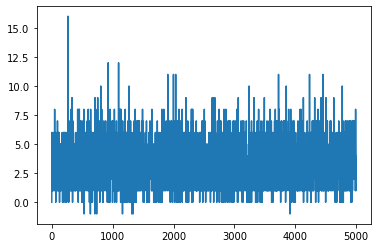

In [ ]:
r1['Участники'].plot();

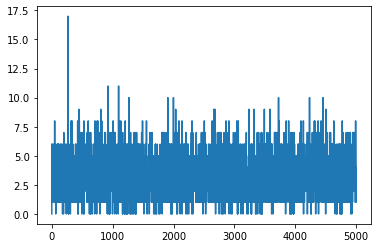

In [ ]:
r2['Участники'].plot();

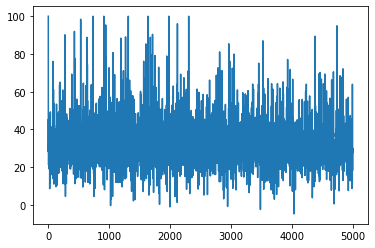

In [ ]:
r1['Уровень снижения'].plot();

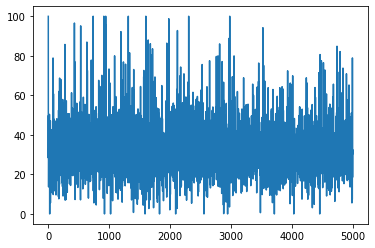

In [ ]:
r2['Уровень снижения'].plot();

In [ ]:
reduction_level_1 = r1[['Уровень снижения']].copy()
participants_1 = r1[['Участники']].copy()

In [ ]:
reduction_level_2 = r2[['Уровень снижения']].copy()
participants_2 = r2[['Участники']].copy()

In [ ]:
reduction_level_1, participants_1

(      Уровень снижения
 0           100.000000
 1            28.062230
 2            35.310335
 3            45.437992
 4            37.865430
 ...                ...
 4995         63.922979
 4996         27.696333
 4997         18.160808
 4998         30.143891
 4999         27.688404
 
 [5000 rows x 1 columns],       Участники
 0             0
 1             6
 2             3
 3             1
 4             1
 ...         ...
 4995          1
 4996          4
 4997          3
 4998          4
 4999          4
 
 [5000 rows x 1 columns])

In [ ]:
reduction_level_2, participants_2

(      Уровень снижения
 0            99.948029
 1            28.306471
 2            37.376409
 3            49.842260
 4            33.588866
 ...                ...
 4995         78.909669
 4996         21.602069
 4997         18.509759
 4998         32.575629
 4999         30.450276
 
 [5000 rows x 1 columns],       Участники
 0             0
 1             6
 2             3
 3             1
 4             1
 ...         ...
 4995          1
 4996          4
 4997          3
 4998          3
 4999          3
 
 [5000 rows x 1 columns])

In [ ]:
reduction_level_1.to_csv('/content/drive/My Drive/Colab Notebooks/tenderhack/plots/r_l_1.csv', header = True, index = True, sep=';')
participants_1.to_csv('/content/drive/My Drive/Colab Notebooks/tenderhack/plots/p_1.csv', header = True, index = True, sep=';')
reduction_level_2.to_csv('/content/drive/My Drive/Colab Notebooks/tenderhack/plots/r_l_2.csv', header = True, index = True, sep=';')
participants_2.to_csv('/content/drive/My Drive/Colab Notebooks/tenderhack/plots/p_2.csv', header = True, index = True, sep=';')

In [ ]:
submit.to_csv('/content/drive/My Drive/Colab Notebooks/tenderhack/submit/LeaderStat_4382661_TenderHack_Moscow.csv ', header = True, index = False, sep=';')

In [ ]:
submit

,id,Уровень снижения,Участники
0,2,24.315733,3
1,10,29.956203,2
2,14,32.322667,3
3,15,23.711605,3
4,19,29.402953,4
...,...,...,...
41684,288429,78.909669,1
41685,288431,21.602069,4
41686,288442,18.509759,3
41687,288444,32.575629,3


In [ ]:
reduction_level_final = submit[['Уровень снижения']].copy()
participants_final = submit[['Участники']].copy()

In [ ]:
reduction_level_final.to_csv('/content/drive/My Drive/Colab Notebooks/tenderhack/plots_final/r_l_final.csv', header = True, index = True, sep=';')
participants_final.to_csv('/content/drive/My Drive/Colab Notebooks/tenderhack/plots_final/p_final.csv', header = True, index = True, sep=';')

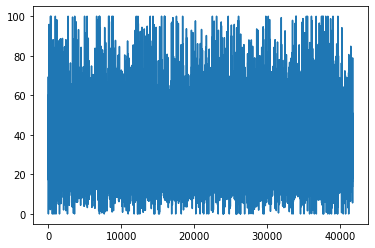

In [75]:
submit['Уровень снижения'].plot();

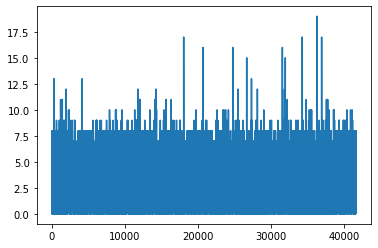

In [77]:
submit['Участники'].plot();